In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df[["v1","v2"]]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
## To rename columns
df.rename(columns={'v1' :'category','v2':'message'},inplace=True)
df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# check count and unique and top values and their frequency
df['category'].value_counts()

ham     4825
spam     747
Name: category, dtype: int64

In [6]:
# check percentage of data - states how much data needs to be balanced
print(str(round(747/4825,2))+'%')

0.15%


In [7]:
# creating 2 new dataframe as df_ham , df_spam

df_spam = df[df['category']=='spam']

df_ham = df[df['category']=='ham']

print("Ham Dataset Shape:", df_ham.shape)

print("Spam Dataset Shape:", df_spam.shape)

Ham Dataset Shape: (4825, 2)
Spam Dataset Shape: (747, 2)


In [8]:
# downsampling ham dataset - take only random 747 example
# will use df_spam.shape[0] - 747
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [9]:
# concating both dataset - df_spam and df_ham_balanced to create df_balanced dataset
df_balanced = pd.concat([df_spam , df_ham_downsampled])

In [10]:
#Checking the value counts again projects downsampling we have done-)
df_balanced['category'].value_counts()

spam    747
ham     747
Name: category, dtype: int64

In [11]:
#Printing few samples wouldn’t hurt either – 10 samples
# Returns – Evenly distributed data of spam and ham
df_balanced.sample(10)

,category,message
190,spam,Are you unique enough? Find out from 30th Augu...
4577,spam,Urgent! call 09066350750 from your landline. Y...
3420,spam,Welcome! Please reply with your AGE and GENDER...
820,ham,Good afternoon starshine! How's my boytoy? Doe...
3456,ham,Friendship poem: Dear O Dear U R Not Near But ...
5174,ham,Water logging in desert. Geoenvironmental impl...
5044,ham,We have sent JD for Customer Service cum Accou...
4559,ham,I'm awake oh. What's up.
1799,ham,"If we hit it off, you can move in with me :)"
3527,spam,You are a å£1000 winner or Guaranteed Caller P...


In [ ]:
#Preprocessing of Spam Detection Data
#One Hot Encoding Categories
#As can be seen, we have only text as categorical data, and the model doesn’t understand them. So instead of text, we can just assign integer labels to our class ham and spam as 0 and 1 respectively, and store it in new column spam. This is called- Hot-Encoding
#To achieve this we will just be filtering the column category and perform operations:
#1 – If a category is a ham/ not spam
#0 – if the category is spam
#The best part is that we can use the one-liner lambda function to achieve the following result and apply it to the dataframe for all values.
#Lambda Fn Syntax = [lambda x : value expression else value]

In [12]:
# creating numerical repersentation of category - one hot encoding
df_balanced['spam'] = df_balanced['category'].apply(lambda x:1 if x=='spam' else 0)

In [13]:
# displaying data - spam -1 , ham-0
df_balanced.sample(4)

,category,message,spam
2362,ham,How are you doing? Hope you've settled in for ...,0
4125,spam,"SPJanuary Male Sale! Hot Gay chat now cheaper,...",1
357,spam,Ur cash-balance is currently 500 pounds - to m...,1
3557,ham,No da. . Vijay going to talk in jaya tv,0


In [14]:
#Performing Train Test Split
#Now as our data is processed, we can feed it to the model, but if we do so it may be that model will learn the patterns of the data, and when we evaluate it will always predict the right results, which leads to biasing of the model. So we will follow the train test strategy.
# loading train test split
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(df_balanced['message'], df_balanced['spam'],
                                                    stratify = df_balanced['spam'])

In [15]:
X_train.head(5)

5039    Natalie (20/F) is inviting you to be her frien...
1365    HOT LIVE FANTASIES call now 08707509020 Just 2...
2668    Wanna get laid 2nite? Want real Dogging locati...
3161    I can't describe how lucky you are that I'm ac...
4084    Orange brings you ringtones from all time Char...
Name: message, dtype: object

In [16]:
!pip install tensorflow-text
import tensorflow_text as text

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [18]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [19]:
# check the summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [20]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

In [21]:
# compiling our model
model.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [22]:
history = model.fit(X_train, y_train, epochs=2, batch_size = 32)

Epoch 1/2
35/35 [==============================] - 556s 15s/step - loss: 0.6427 - accuracy: 0.6509 - precision: 0.6673 - recall: 0.6018
Epoch 2/2
35/35 [==============================] - 546s 16s/step - loss: 0.5028 - accuracy: 0.8205 - precision: 0.7909 - recall: 0.8714


In [23]:
# Evaluating performance
model.evaluate(X_test,y_test)

12/12 [==============================] - 190s 16s/step - loss: 0.4722 - accuracy: 0.8743 - precision: 0.8608 - recall: 0.8930


[0.4722312092781067, 0.874331533908844, 0.8608247637748718, 0.893048107624054]

In [24]:
## getting y_pred by predicting over X_text and flattening it
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
print(y_predicted)

12/12 [==============================] - 191s 15s/step
[0.50625235 0.70605874 0.1957249  0.6775154  0.21906097 0.26379395
 0.5090882  0.18245326 0.51477003 0.529498   0.408706   0.7573055
 0.14430676 0.59538954 0.3431213  0.52229273 0.6119161  0.61155933
 0.6723426  0.5172514  0.35323185 0.3225933  0.7499634  0.8516681
 0.34481674 0.33525982 0.18939972 0.59433186 0.42210165 0.19828816
 0.76527286 0.6038952  0.6469161  0.54489297 0.41659844 0.7207062
 0.69113874 0.68322885 0.73718286 0.21835756 0.16374972 0.27011162
 0.6375578  0.7408982  0.25127232 0.16347735 0.27687037 0.41540506
 0.35633495 0.43355203 0.6075681  0.6961234  0.69861144 0.20716214
 0.40615815 0.4236311  0.68888664 0.8861817  0.53949624 0.5973751
 0.34913594 0.60277957 0.20719983 0.32319942 0.3163225  0.7285714
 0.27476504 0.32279503 0.32099572 0.7631865  0.5852393  0.25516278
 0.59500986 0.2947789  0.28557253 0.32938495 0.5680615  0.6908319
 0.4284592  0.71345854 0.6516271  0.6579086  0.7221969  0.11451416
 0.18387868 0

In [28]:
# importing confusion maxtrix
from sklearn.metrics import confusion_matrix , classification_report

In [30]:
import numpy as np

# Apply threshold to convert probabilities to binary values
threshold = 0.5
y_predicted_binary = np.where(y_predicted > threshold, 1, 0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predicted_binary)

In [31]:
cm

array([[160,  27],
       [ 20, 167]])

Text(50.722222222222214, 0.5, 'Actual')

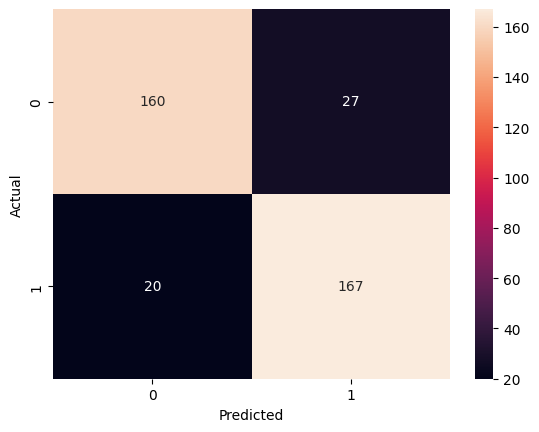

In [32]:
# plotting as a graph - importing seaborn
import seaborn as sns
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

As can be seen for X-axis – We have Predicted Values, For Y-axis – We have Actual Values. Also at diagonal, we have model correct predictions.

Through the graph we can see that out of a total, 160 times the mail was ham (0) and the model predicted it right and for 167 times it was spam and model predicted spam(1), so overall we have created a good model, however one can experiment with the parameters, layers and network architecture to increase it

In [33]:
#Classification report is also plotted similarly:

# printing classification report
print(classification_report(y_test , y_predicted_binary))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       187
           1       0.86      0.89      0.88       187

    accuracy                           0.87       374
   macro avg       0.87      0.87      0.87       374
weighted avg       0.87      0.87      0.87       374



Here also it is evident that the model is a good one as recall and accuracy is good:)

In [ ]:
## Model Prediction for Spam Detection Using BERT
#Now let’s check how the model performs on real-world data.
#Here I have a collection of few spam and ham emails:

In [34]:
predict_text = [
                # Spam
                'We’d all like to get a $10,000 deposit on our bank accounts out of the blue, but winning a prize—especially if you’ve never entered a contest',
                'Netflix is sending you a refund of $12.99. Please reply with your bank account and routing number to verify and get your refund',
                'Your account is temporarily frozen. Please log in to to secure your account ',

                #ham
                'The article was published on 18th August itself',
                'Although we are unable to give you an exact time-frame at the moment, I would request you to stay tuned for any updates.',
                'The image you sent is a UI bug, I can check that your article is marked as regular and is not in the monetization program.'
]

In [35]:
test_results = model.predict(predict_text)

1/1 [==============================] - 4s 4s/step


In [36]:
output = np.where(test_results>0.5,'spam', 'ham')

In [37]:
output

array([['ham'],
       ['spam'],
       ['spam'],
       ['ham'],
       ['spam'],
       ['spam']], dtype='<U4')

In [40]:
def get_embedding(sentence_arr):
    'takes in sentence array and return embedding vector'
    preprocessed_text = bert_preprocess(sentence_arr)
    embeddings = bert_encoder(preprocessed_text)['pooled_output']
    return embeddings

In [41]:
e = get_embedding([
               'We’d all like to get a $10,000 deposit on our bank accounts out of the blue, but winning a prize—especially if you’ve never entered a contest',
               'The image you sent is a UI bug, I can check that your article is marked as regular and is not in the monetization program.'
])

In [43]:
# load similartiy score
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
# check similarity score
print(f'Similarity score between 1st sentence(spam) and second sentence(spam) : {cosine_similarity([e[0]] , [e[1]])}')

Similarity score between 1st sentence(spam) and second sentence(spam) : [[0.85391915]]


Not exact similarity, may show un expected results as can be seen - they are somewhat similar but its false as spam and actual can't be same

In conclusion, BERT is a powerful NLP Model that can be used for the classification task. When applied we can see it effectively understands the context of a text, which is crucial for accurately identifying patterns and features indicative of spam. The pre-trained BERT model can be fine-tuned to improve the performance of the model

The use of BERT model for spam filtering can significantly improve the overall efficiency and efectivness of email systems, and it is a promising approach to tackle the text classification problem.